In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4x4 Gridworld

<img src="imgs/grid_world_4_4.png" width = "400">

In [ ]:
# 4x4 grid: stateler = 0..15
states = list(range(16))
actions = ["up", "down", "left", "right"]

# 15 ve 0 terminal stateler
terminal_states = [0,15]
reward = -1

In [ ]:
def f(s, a):
    
    """ Geçiş fonksiyonu: s durumundan a aksiyonu uygulandığında gidilen durumu döndürür. """
    
    row, col = divmod(s, 4)
    if a == "up":
        return s - 4 if row > 0 else s
    elif a == "down":
        return s + 4 if row < 3 else s
    elif a == "left":
        return s - 1 if col > 0 else s
    elif a == "right":
        return s + 1 if col < 3 else s
    return s

<img src="imgs/iterative_policy_Evaluation.png" width="400"/>

In [ ]:
def render_value_matrix(value_matrix, title=None):
    
    """ Gridworld ortamındaki mevcut value tablosunu görselleştirmeye yarar."""
    
    fig, ax = plt.subplots(figsize=(3, 3))
    if title is not None:
        ax.set_title(title, fontsize=16)
    sns.heatmap(value_matrix, annot=True, fmt=".2f", cmap="Greys",linewidths=1, linecolor="grey", cbar=False, square=True, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    return fig, ax

In [ ]:
def value_iteration_random_policy(states, actions, gamma=0.9, theta=1e-5, log=False):
    
    """ Eş-olasılıklı rastgele politika altında (her aksiyon %25 ihtimalle seçiliyor) değer fonksiyonunu iteratif olarak çözer.  """
    
    iteration = 0
    V = np.zeros(len(states))
    while True:
        delta = 0
        newV = np.copy(V)
        iteration += 1
        for s in states:
            # Terminal durumları sabit tutalım
            if s in terminal_states:
                newV[s] = 0.0
            else:
                # Eş olasılıklı politika: Tüm aksiyonların beklenen getirisinin ortalaması alınır
                sum_value = 0.0
                for a in actions:
                    next_s = f(s, a)
                    sum_value += reward + gamma * V[next_s]
                newV[s] = sum_value / len(actions)
            
            delta = max(delta, abs(newV[s] - V[s]))
        
        V = newV
        # Loglama açıksa iteratif bir şekilde value matrisini görselleştirelim
        if log == True:
            render_value_matrix(V.reshape((4, 4)), title=f"Iteration {iteration}")
        if delta < theta:
            break
    
    # Terminal durumları en son yine 0'a ayarla (her ihtimale karşı)
    for t in terminal_states:
        V[t] = 0.0
    
    return V,iteration

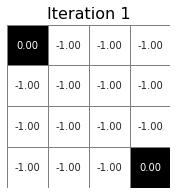

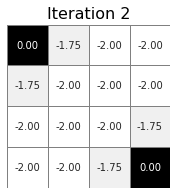

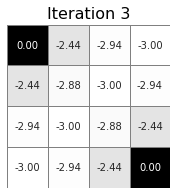

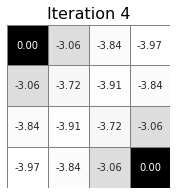

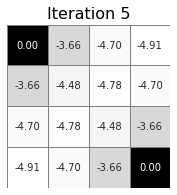

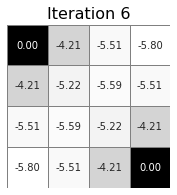

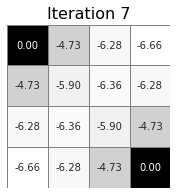

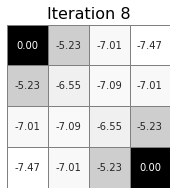

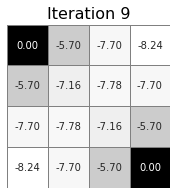

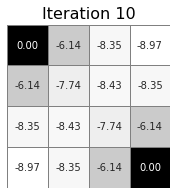

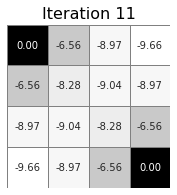

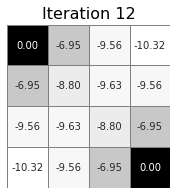

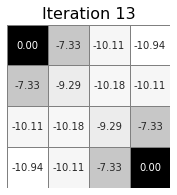

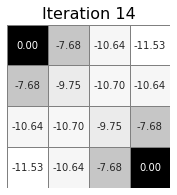

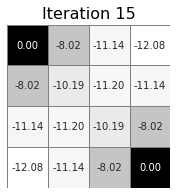

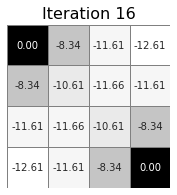

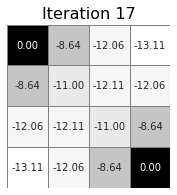

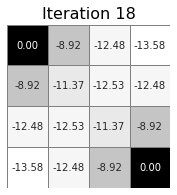

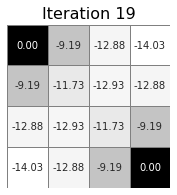

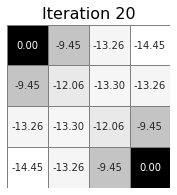

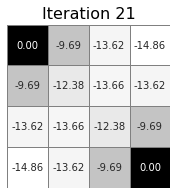

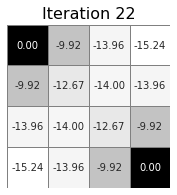

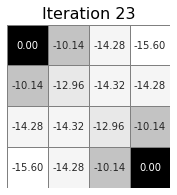

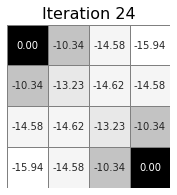

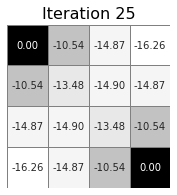

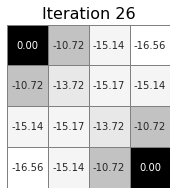

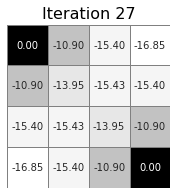

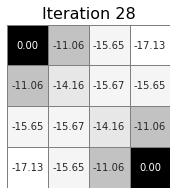

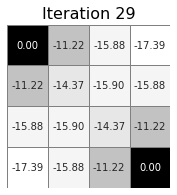

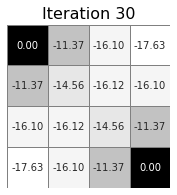

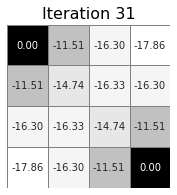

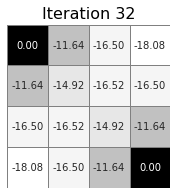

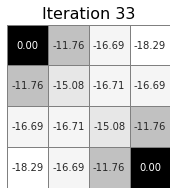

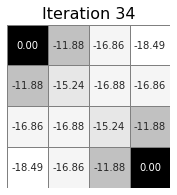

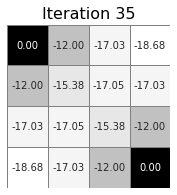

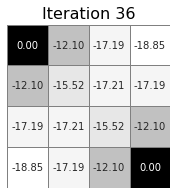

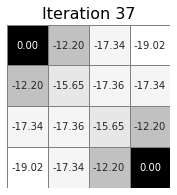

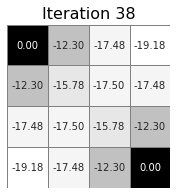

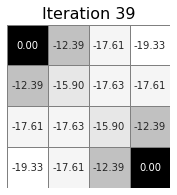

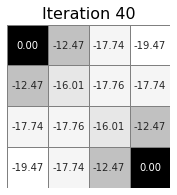

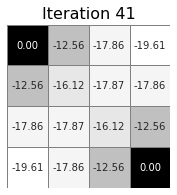

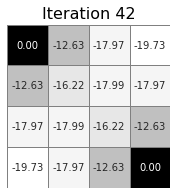

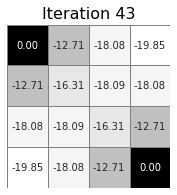

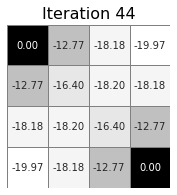

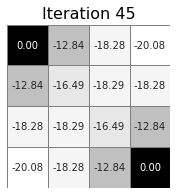

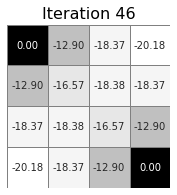

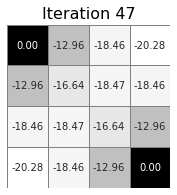

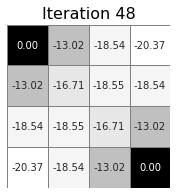

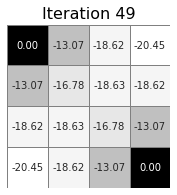

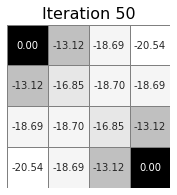

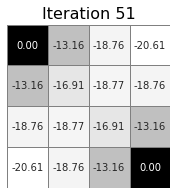

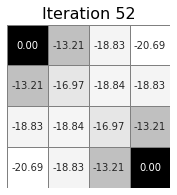

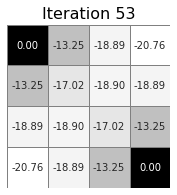

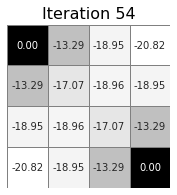

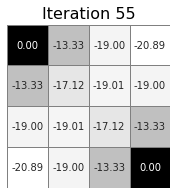

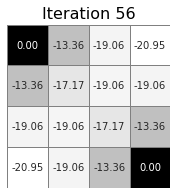

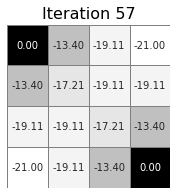

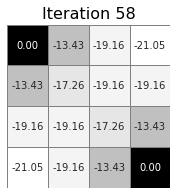

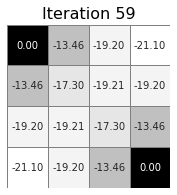

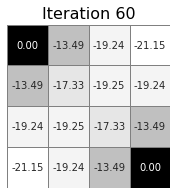

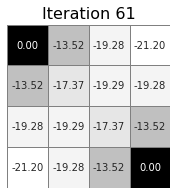

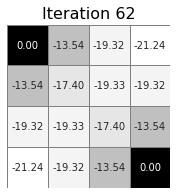

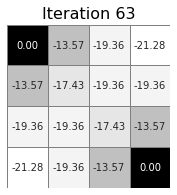

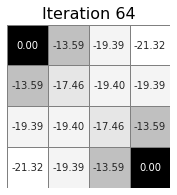

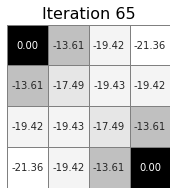

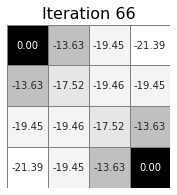

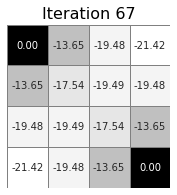

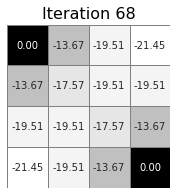

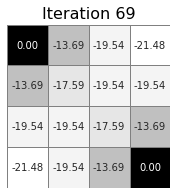

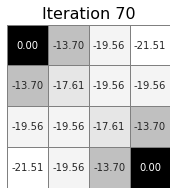

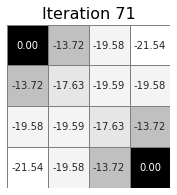

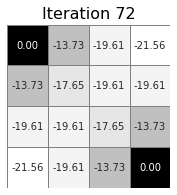

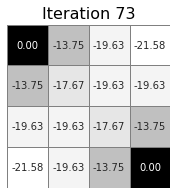

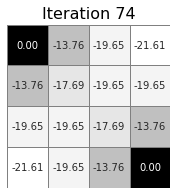

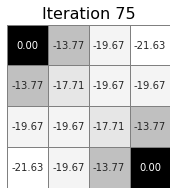

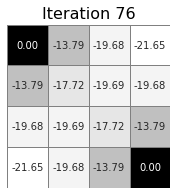

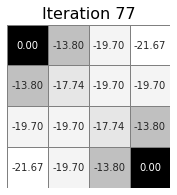

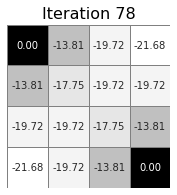

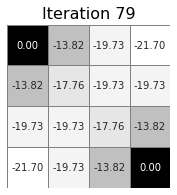

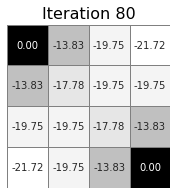

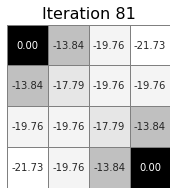

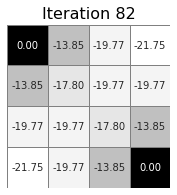

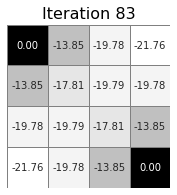

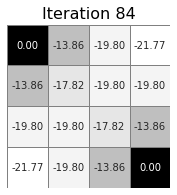

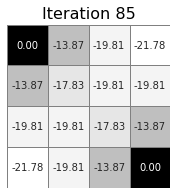

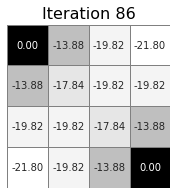

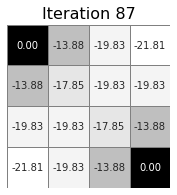

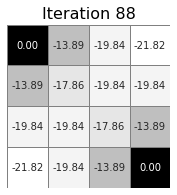

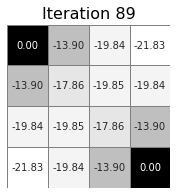

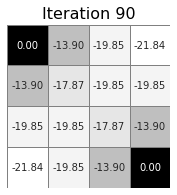

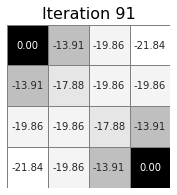

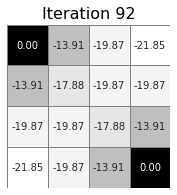

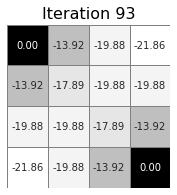

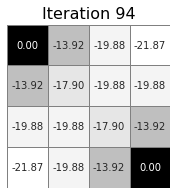

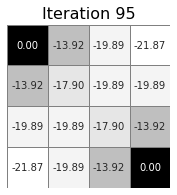

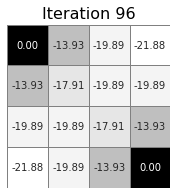

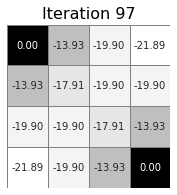

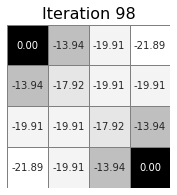

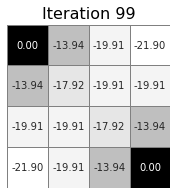

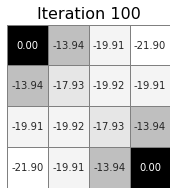

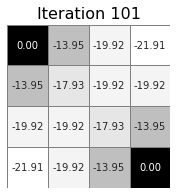

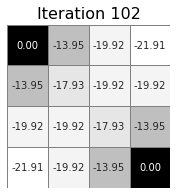

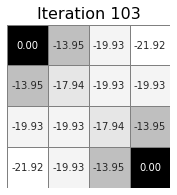

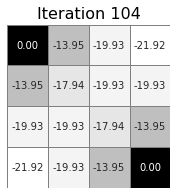

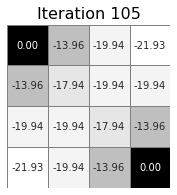

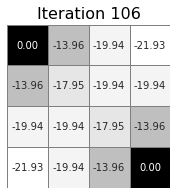

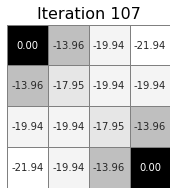

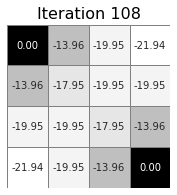

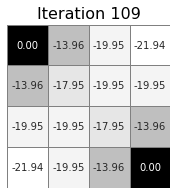

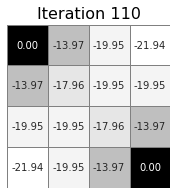

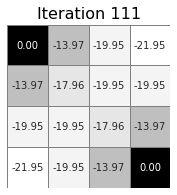

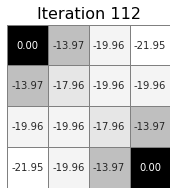

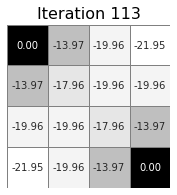

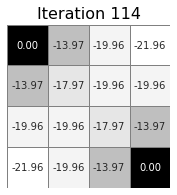

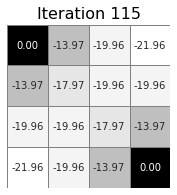

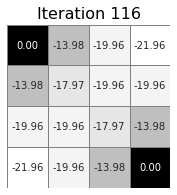

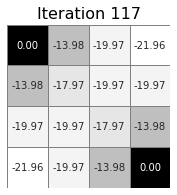

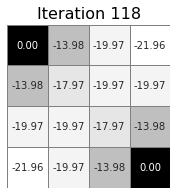

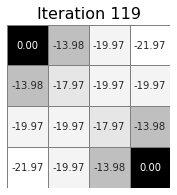

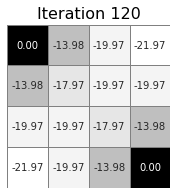

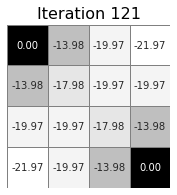

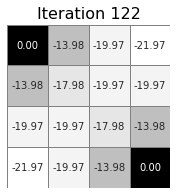

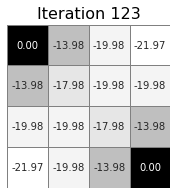

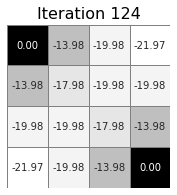

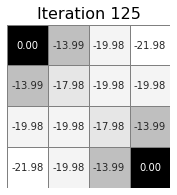

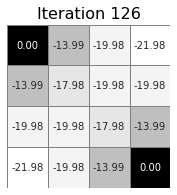

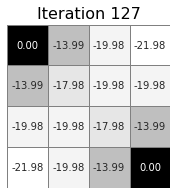

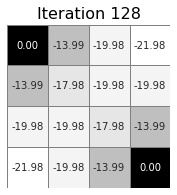

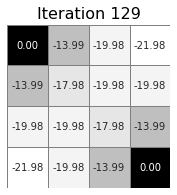

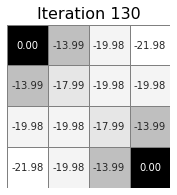

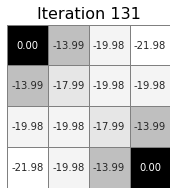

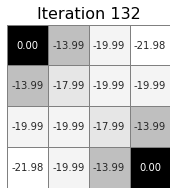

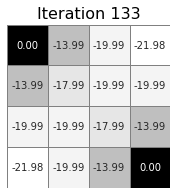

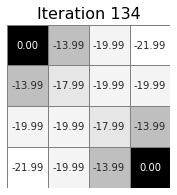

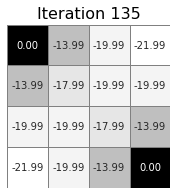

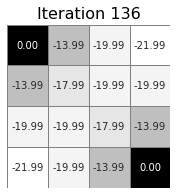

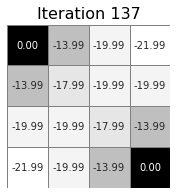

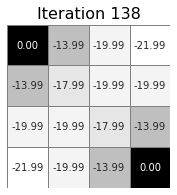

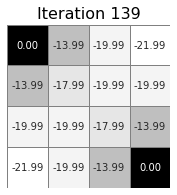

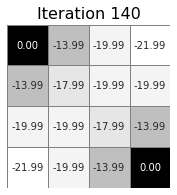

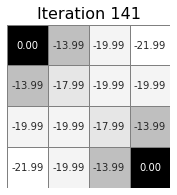

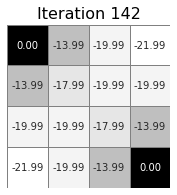

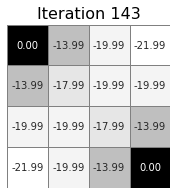

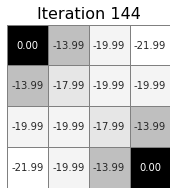

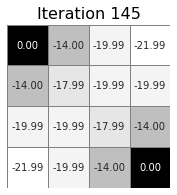

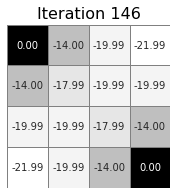

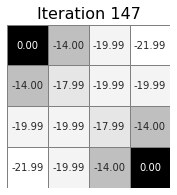

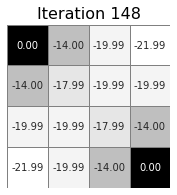

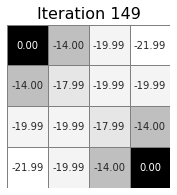

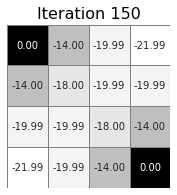

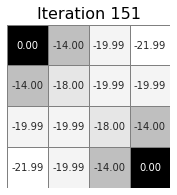

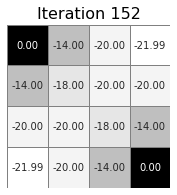

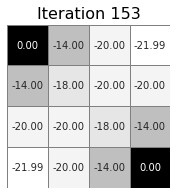

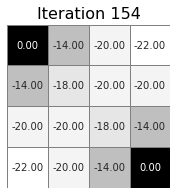

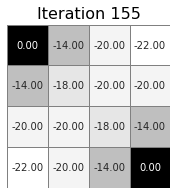

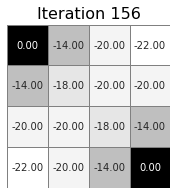

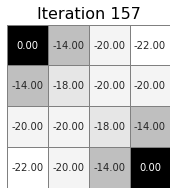

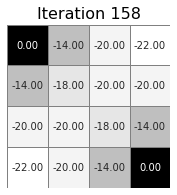

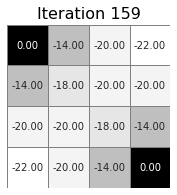

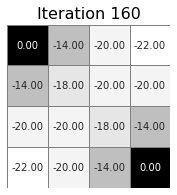

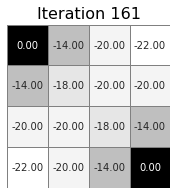

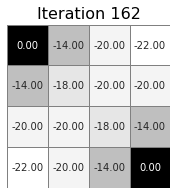

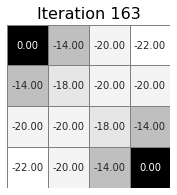

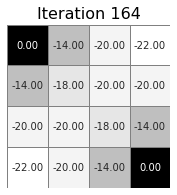

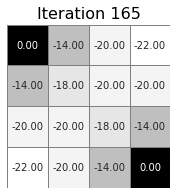

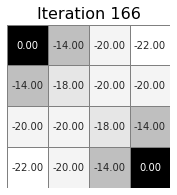

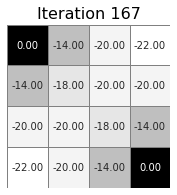

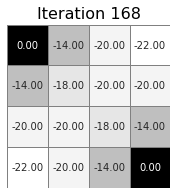

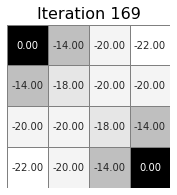

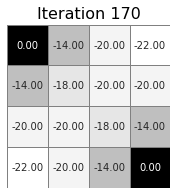

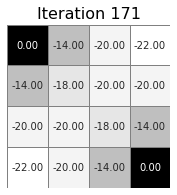

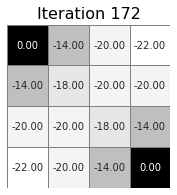

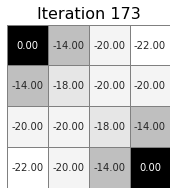

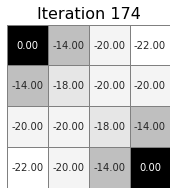

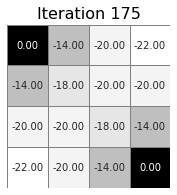

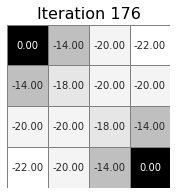

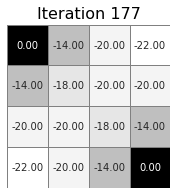

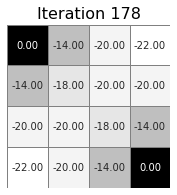

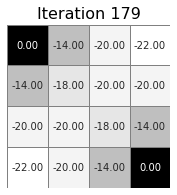

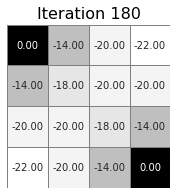

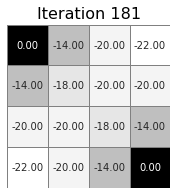

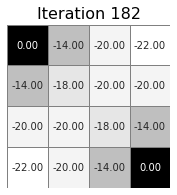

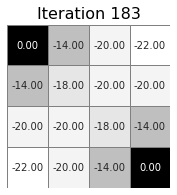

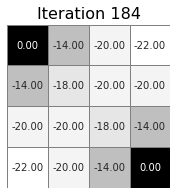

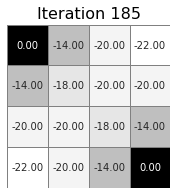

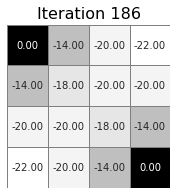

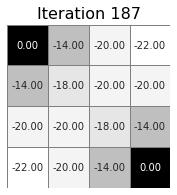

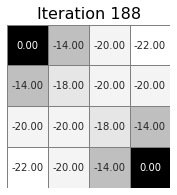

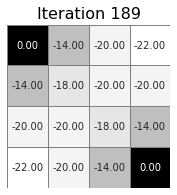

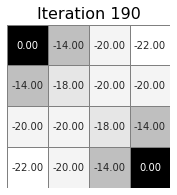

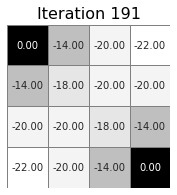

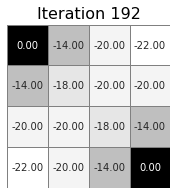

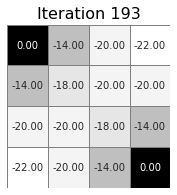

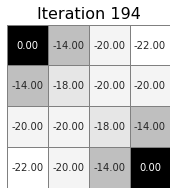

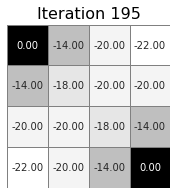

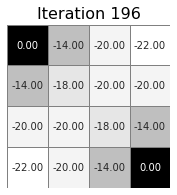

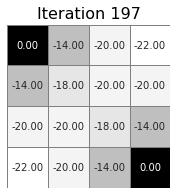

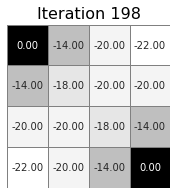

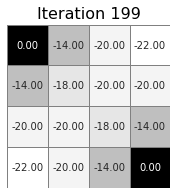

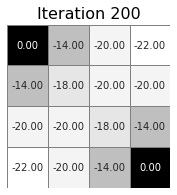

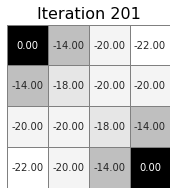

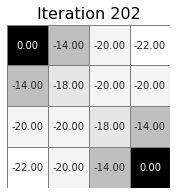

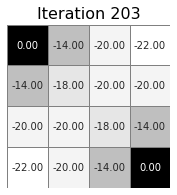

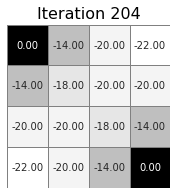

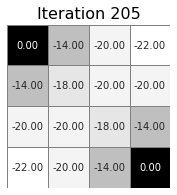

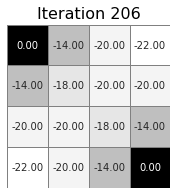

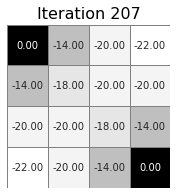

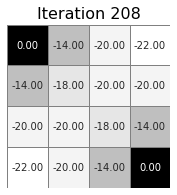

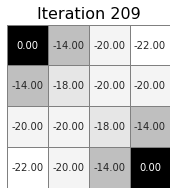

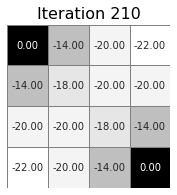

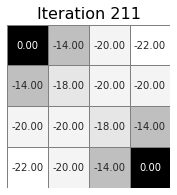

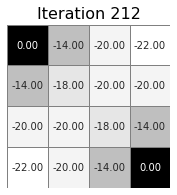

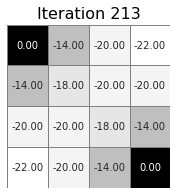

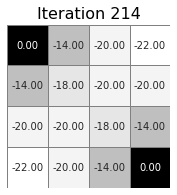

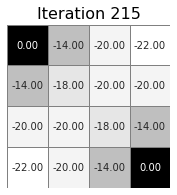

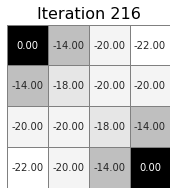

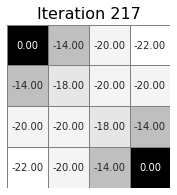

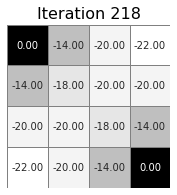

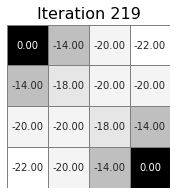

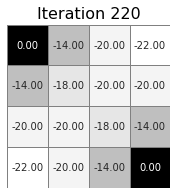

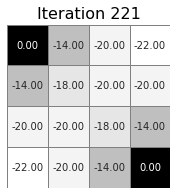

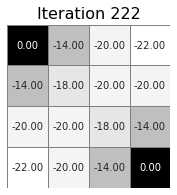

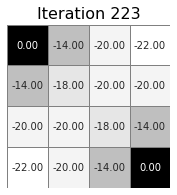

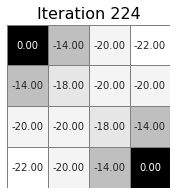

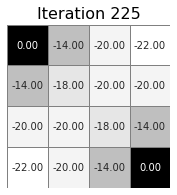

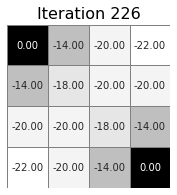

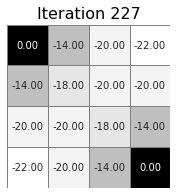

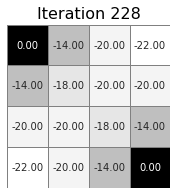

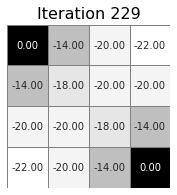

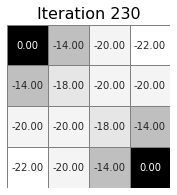

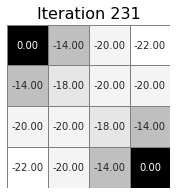

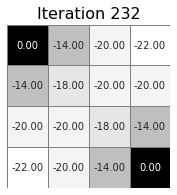

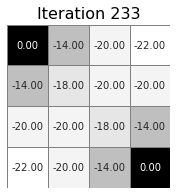

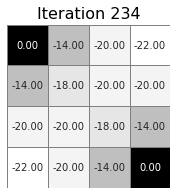

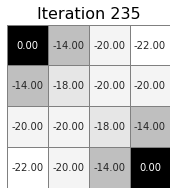

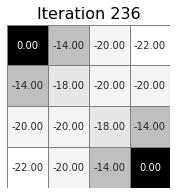

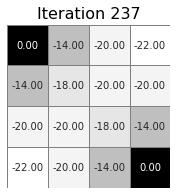

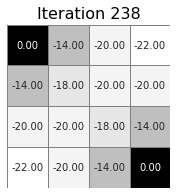

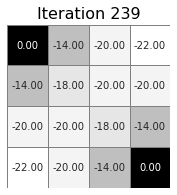

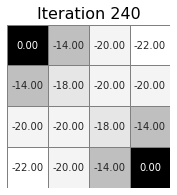

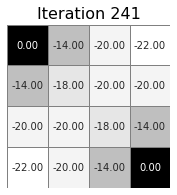

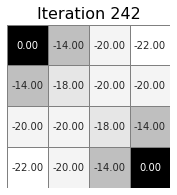

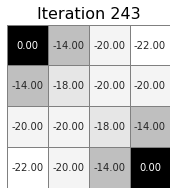

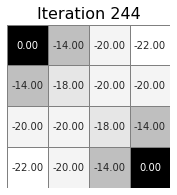

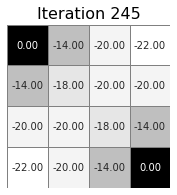

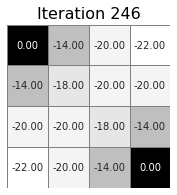

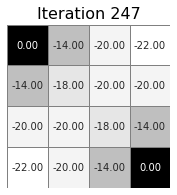

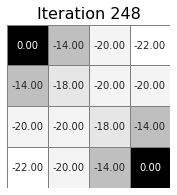

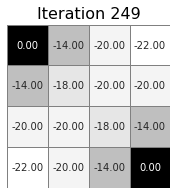

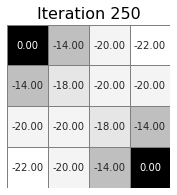

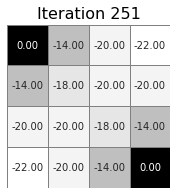

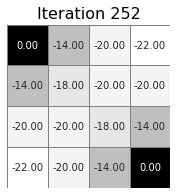

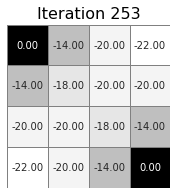

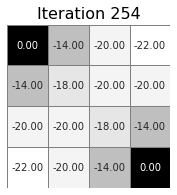

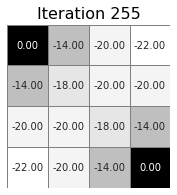

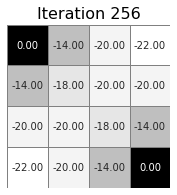

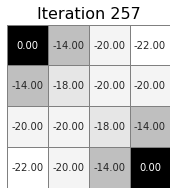

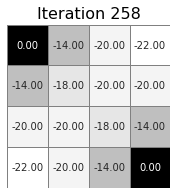

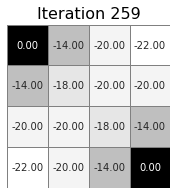

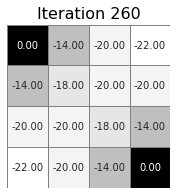

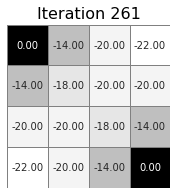

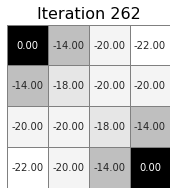

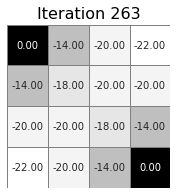

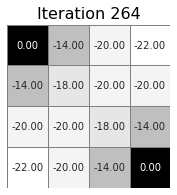

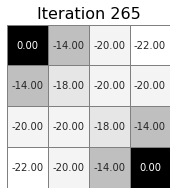

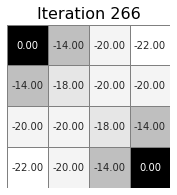

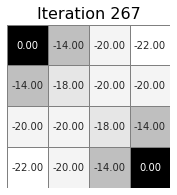

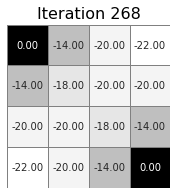

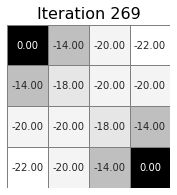

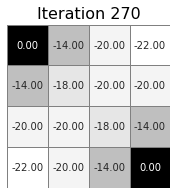

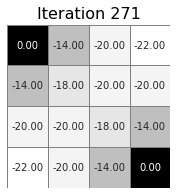

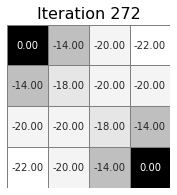

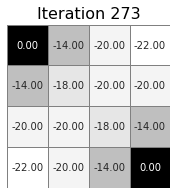

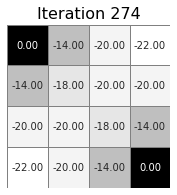

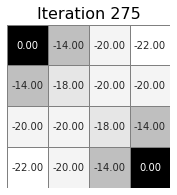

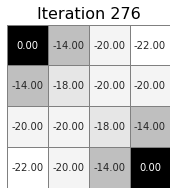

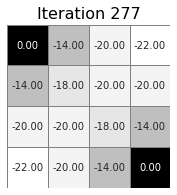

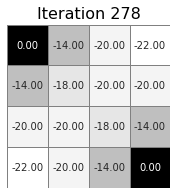

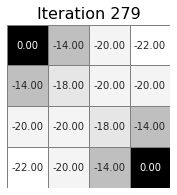

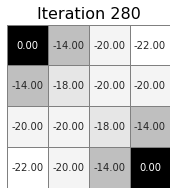

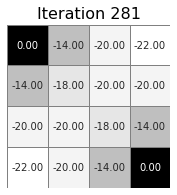

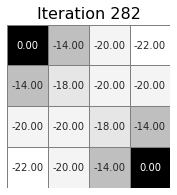

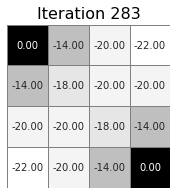

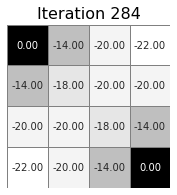

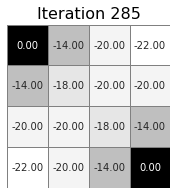

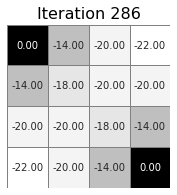

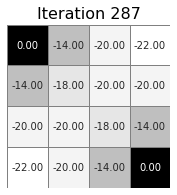

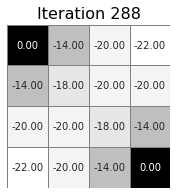

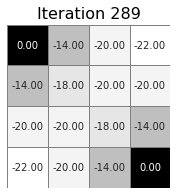

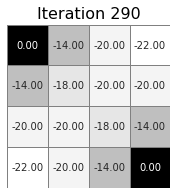

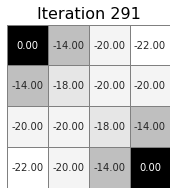

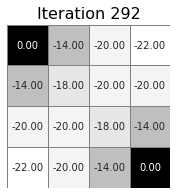

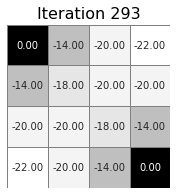

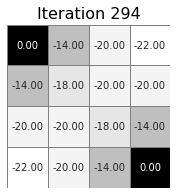

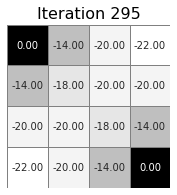

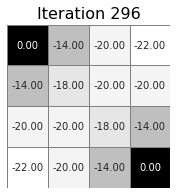

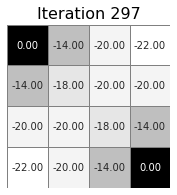

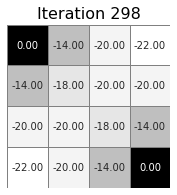

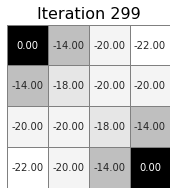

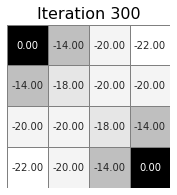

[[  0.         -13.99999897 -19.99999848 -21.9999983 ]
 [-13.99999897 -17.99999866 -19.99999849 -19.99999848]
 [-19.99999848 -19.99999849 -17.99999866 -13.99999897]
 [-21.9999983  -19.99999848 -13.99999897   0.        ]]


In [ ]:
# Değer fonksiyonunu iteratif olacak şekilde hesaplayalım
value_function,iteration = value_iteration_random_policy(states, actions, gamma=1, theta=1e-7,log = True)

# 4x4 matris şeklinde bastıralım
value_matrix = value_function.reshape((4,4))
print(value_matrix)

# Optimal Policy of Grid World

<img src="imgs/optimal_policy.png" width="400"/>

# Policy Evaluation

### Example 4.1

In [7]:
# Ödül Fonksiyonumuz -1 olarak belirlenmiştir
def r(s, s_next, a):
    return -1  # Constant reward for all transitions

In [8]:
# Action-value fonksiyonunu tanımlayalım 
def q_pi(s, a, v_pi, gamma=1.0):
    s_next = f(s, a)
    row, col = divmod(s_next, 4)
    return r(s, s_next, a) + gamma * value_matrix[row][col]

In [9]:
# Herhangi bir state-action ikilisi için q fonksiyonunu tanımlayalım
def compute_q(state, action, gamma=1.0):
    q_value = q_pi(state, action, value_matrix, gamma)
    return q_value

In [10]:
while True:
    try:
        # Kullanıcıdan input alır
        state = int(input("Enter the state (0-15) (-1 to exit): "))
        
        if state == -1:
            break
        action = input("Enter the action (up, down, left, right): ").lower()
        
        # Doğru input mu kontrol edelim
        if state < 0 or state > 15 or action not in ["up", "down", "left", "right"]:
            print("Invalid input. Please try again.")
            continue

        # q-value'yu hesaplayıp, bastıralım.
        q_value = compute_q(state, action)
        print(f"q_pi({state}, '{action}') = {q_value:.2f}")
        
    except Exception as e:
        print(f"Error: {e}")
        break

Enter the state (0-15) (-1 to exit): 11
Enter the action (up, down, left, right): down
q_pi(11, 'down') = -1.00
Enter the state (0-15) (-1 to exit): 7
Enter the action (up, down, left, right): down
q_pi(7, 'down') = -15.00
Enter the state (0-15) (-1 to exit): -1


### Example 4.2

#####  First scenario

In [11]:
def f(s, a):
    """
    State 13'ün altına eklenen yeni state'e göre Geçiş fonksiyonumuzu tanımlayalım
    
    - State 15 aksiyonları:
        left  -> 12
        up    -> 13
        right -> 14
        down  -> 15
    """
    
    # Yeni eklenen state için soruda dendiği şekilde ayarlamaları yapalım:
    if s == 16:
        if a == "left":
            return 12
        elif a == "up":
            return 13
        elif a == "right":
            return 14
        elif a == "down":
            return 16  # remains in 15
        else:
            return s

    # Geri kalan kısım aynı kalacak
    row, col = divmod(s, 4)

    if a == "up":
        return s - 4 if row > 0 else s
    elif a == "down":
        return s + 4 if row < 3 else s
    elif a == "left":
        return s - 1 if col > 0 else s
    elif a == "right":
        return s + 1 if col < 3 else s
    
    return s

In [12]:
# Iterative Policy Evaluation Hesaplamasini yapalim
states = list(range(17))

value_function,iteration = value_iteration_random_policy(states, actions, gamma=1, theta=1e-7, log=False)

# Yeni eklenen state'in value'sunu bastıralım
print("Number of Iteration: ", iteration)
print(value_function[16])
print(value_function)

Number of Iteration:  300
-19.999998476934596
[  0.         -13.99999897 -19.99999848 -21.9999983  -13.99999897
 -17.99999866 -19.99999849 -19.99999848 -19.99999848 -19.99999849
 -17.99999866 -13.99999897 -21.9999983  -19.99999848 -13.99999897
   0.         -19.99999848]


In [13]:
# Mevcut policy'i kullanarak random policy'e göre policy hesaplamasını da yapalım
def compute_v_pi_15(v_pi, gamma=1.0):
    actions = ["left", "up", "right", "down"]
    transitions = [12, 13, 14, 15] 
    
    # Initialize v_pi(15)
    v_15 = 0
    for i, action in enumerate(actions):
        s_next = transitions[i]
        row, col = divmod(s_next, 4)
        v_15 += (1 / 4) * (r(15,action,s_next) + gamma * v_pi[row][col])
    
    # Recursive term
    v_15 /= (1 - (1 / 4) * gamma)
    return v_15

In [14]:
v_15 = compute_v_pi_15(value_matrix)
print(f"v_pi(15) = {v_15:.2f}")

v_pi(15) = -20.00


##### Second Scenario

In [15]:
def f(s, a):
    """
    - State 13'ten, "down" action'u verildiğinde -> 15'e gidecek şekilde ayarlamalarımızı yaptığımız Geçiş fonksiyonu
    - Geri kalan kısımlar aynı kalmıştır.
    """
    
    if s == 16:
        if a == "left":
            return 12
        elif a == "up":
            return 13
        elif a == "right":
            return 14
        elif a == "down":
            return 16
        else:
            return s

    # State 13'teyken "down" action'ı geldiğinde yeni state'e gidecek şekilde ayarlayalım.
    if s == 13 and a == "down":
        return 16

    # Otherwise, use the original 4x4 row-col logic:
    row, col = divmod(s, 4)
    
    if a == "up":
        return s - 4 if row > 0 else s
    elif a == "down":
        return s + 4 if row < 3 else s
    elif a == "left":
        return s - 1 if col > 0 else s
    elif a == "right":
        return s + 1 if col < 3 else s
    
    return s

In [16]:
# Iterative Policy Evaluation Hesaplamasi
states = list(range(17))

value_function,iteration  = value_iteration_random_policy(states, actions, gamma=1, theta=1e-7, log=False)

print("Number of Iteration: ", iteration)
print(value_function[16])
print(value_function)

Number of Iteration:  300
-19.999998455839744
[  0.         -13.99999896 -19.99999846 -21.99999828 -13.99999896
 -17.99999864 -19.99999847 -19.99999846 -19.99999846 -19.99999847
 -17.99999864 -13.99999896 -21.99999828 -19.99999846 -13.99999896
   0.         -19.99999846]


In [17]:
# Mevcut policy'i kullanarak equiprobable random policy'e göre policy hesaplamasını da yapalım
def compute_v_pi_15_dynamic(v_pi, gamma=1.0):
    actions = ["left", "up", "right", "down"]
    transitions_15 = [12, 13, 14, 15] 
    
    # State 13 transitionlarını güncelleyelim
    transitions_13 = [12, 9, 14, 15]  
    
    # State 13 policy hesaplayalım
    v_13 = 0
    for i, action in enumerate(actions):
        s_next = transitions_13[i]
        if s_next < 15:
            row, col = divmod(s_next, 4) 
        else:
            row,col = (3, 1)
        v_13 += (1 / 4) * (r(13,s_next,action) + gamma * v_pi[row][col])
    
    print("Updated new v13 = ", v_13)
    
    # Yeni state 13 policyi tablomuzda da guncelleyelim ve state-15 için policy hesaplayalım
    v_pi[3][1] = v_13
    
    v_15 = 0
    for i, action in enumerate(actions):
        s_next = transitions_15[i]
        if s_next < 15:
            row, col = divmod(s_next, 4) 
        else:
            row, col = (3, 1)
        v_15 += (1 / 4) * (r(15,s_next,action) + gamma * v_pi[row][col])

    return v_15

In [18]:
v_15_dynamic = compute_v_pi_15_dynamic(value_matrix)
print(f"v_pi(15) with updated dynamics = {v_15_dynamic:.2f}")

Updated new v13 =  -19.999998561408344
v_pi(15) with updated dynamics = -20.00


### Example 4.3

### Action-Value Functions Analogous to Equations (4.3), (4.4), and (4.5)

Action-value functions $q_\pi(s, a)$ için, durum-değer fonksiyonlarına $v_\pi(s)\$ eşdeğer olan denklemler şu şekilde türetilebilir:

### (4.3) Denklemine Eşdeğer Aksiyon-Değer Fonksiyonu

Aksiyon-değer fonksiyonu $q_\pi(s, a)$, bir duruma $s$ geldiğinizde bir aksiyon $a$ seçip ardından politikayı $\pi$ takip ederek beklenen getiriyi ifade eder:

$$
q_\pi(s, a) = \mathbb{E}_\pi \left[ R_{t+1} + \gamma G_{t+1} \mid S_t = s, A_t = a \right]
$$

Getirinin $G_t$ tanımını yerine koyarak şu hale gelir:

$$
q_\pi(s, a) = \mathbb{E}_\pi \left[ R_{t+1} + \gamma v_\pi(S_{t+1}) \mid S_t = s, A_t = a \right]
$$

Bu denklem, **(4.3)**'ün aksiyon-değer fonksiyonu için eşdeğeridir.

---

### (4.4) Denklemine Eşdeğer Aksiyon-Değer Fonksiyonu

$q_\pi(s, a)$'yı, durumlar ve ödüller üzerindeki geçiş olasılığı $p(s', r \mid s, a)$ ile ifade edebiliriz:

$$
q_\pi(s, a) = \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma v_\pi(s') \right]
$$

Durum-değer fonksiyonunun $v_\pi(s')$) tanımını eklersek:

$$
v_\pi(s') = \sum_{a'} \pi(a' \mid s') q_\pi(s', a')
$$

Bu ifadeyi $q_\pi(s, a)$'ya koyarsak:

$$
q_\pi(s, a) = \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma \sum_{a'} \pi(a' \mid s') q_\pi(s', a') \right]
$$

Bu, **(4.4)**'ün aksiyon-değer fonksiyonu için eşdeğeridir.

---

### (4.5) Denklemine Eşdeğer Aksiyon-Değer Fonksiyonu

Politika değerlendirmesi iteratif olarak yapıldığında $q_\pi(s, a)$, aşağıdaki şekilde güncellenir:

$$
q_{k+1}(s, a) = \mathbb{E}_\pi \left[ R_{t+1} + \gamma v_k(S_{t+1}) \mid S_t = s, A_t = a \right]
$$

Bu ifadeyi geçiş olasılığına göre genişletirsek:

$$
q_{k+1}(s, a) = \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma v_k(s') \right]
$$

Durum-değer fonksiyonunun $v_k(s')$ tanımını yerine koyarsak:

$$
v_k(s') = \sum_{a'} \pi(a' \mid s') q_k(s', a')
$$

Sonuç olarak:

$$
q_{k+1}(s, a) = \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma \sum_{a'} \pi(a' \mid s') q_k(s', a') \right]
$$

Bu, **(4.5)**'in aksiyon-değer fonksiyonu için eşdeğeridir.

---

### Özet

1. **(4.3) Eşdeğeri:**

   $$
   q_\pi(s, a) = \mathbb{E}_\pi \left[ R_{t+1} + \gamma v_\pi(S_{t+1}) \mid S_t = s, A_t = a \right]
   $$

2. **(4.4) Eşdeğeri:**

   $$
   q_\pi(s, a) = \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma \sum_{a'} \pi(a' \mid s') q_\pi(s', a') \right]
   $$

3. **(4.5) Eşdeğeri:**

   $$
   q_{k+1}(s, a) = \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma \sum_{a'} \pi(a' \mid s') q_k(s', a') \right]
   $$
